# Clustering Based on Neural Networks in Wireless Sensor Networks

In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean

---
## Using Cluster Blobs and Clustering with KMeans


In [87]:
df = pd.read_csv("../Dataset/blobs_dataset.csv")
df.head()

,x,y
0,-2.143722,4.128762
1,-2.459323,4.161950
2,-6.374448,-8.003754
3,-10.310702,-3.096193
4,-6.656838,-3.227972


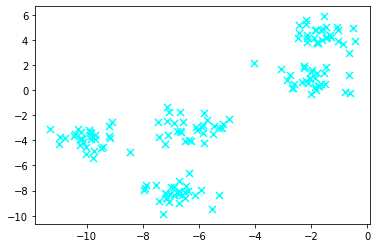

[0 0 2 1 3 2 0 0 4 3 4 3 4 1 4 3 4 3 4 2 1 3 1 3 2 3 1 1 2 1 0 0 2 1 4 1 2
 2 4 4 2 3 0 4 0 1 3 2 2 1 0 4 0 0 1 2 1 2 3 0 3 3 4 1 4 2 2 2 4 1 0 3 0 4
 3 3 1 2 0 0 3 2 1 1 2 0 3 2 4 3 2 4 4 4 4 4 2 2 0 3 1 4 3 1 0 1 0 1 0 2 4
 3 0 3 4 3 0 0 1 1 2 3 4 4 1 2 3 1 4 4 3 0 2 2 2 1 0 0 2 4 1 1 4 1 0 0 0 3
 3 3]


In [88]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.7,
    shuffle=True, random_state=1
)
# np.savetxt("../Dataset/blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [89]:
#Applying clustering assuming 3 nodes

km = KMeans(
    n_clusters=5
    ,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X)

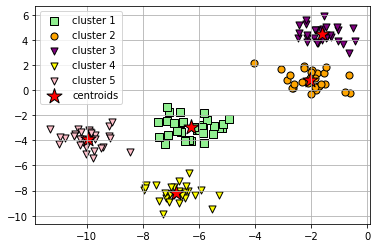

In [90]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)
plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='pink',
    marker='v', edgecolor='black',
    label='cluster 5'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Text(0, 0.5, 'Y-Value')

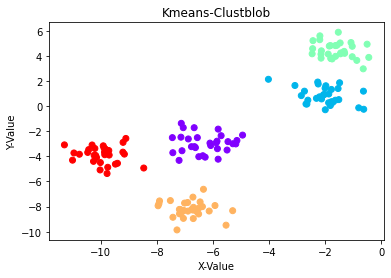

In [91]:
plt.scatter(X[:,0],X[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Clustblob")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
# plt.savefig("kmeans_blob.jpg")
# plt.legend()  

- The above plot tells us that 5 clusters are appropriate enough due to the elbow forming at 5 and the improvement becomes very less there after

## Analysing Performance (Energy)


### 1. Finding Energy with Clustering

In [92]:
# assuming base station at point B(-6,6)
B = [-6.0,6.0]
B = np.array(B)

In [93]:
# calculating distances of cluster nodes with cluster heads
km.cluster_centers_

array([[-6.28009635, -2.97780066],
       [-2.02566024,  0.83410069],
       [-1.59530399,  4.42739586],
       [-6.82766344, -8.2096359 ],
       [-9.95564539, -3.89047623]])

In [94]:
def calcdist(heads,points,y_clust):
    # print(heads)
    # print(heads[0])
    num_heads = heads.size // 2
    num_points = points.size //2
    dist = []
    for i in range(num_points):
        y_c = y_clust[i]
        head = heads[y_c]
        # print(head,y_c,points[i])
        dist.append(euclidean(points[i],head))
    return dist

In [95]:
# Calculating Distances from Cluster Heads
node_distances = []
node_distances = calcdist(km.cluster_centers_,X,y_km)
node_distances
        


[0.6244555503442799,
 0.9038748603387466,
 0.4977869402063779,
 0.8700293956957528,
 0.4522385627067006,
 0.3338181112285502,
 1.4509325753576348,
 0.7551558814423017,
 0.5490362261853203,
 1.0970040393534997,
 0.5529147844941555,
 0.9907930368846365,
 0.9159927911064301,
 0.7290479180569057,
 1.4405485801624776,
 1.6322847856834544,
 0.7855890972840839,
 0.25885639633427493,
 0.7467987052390438,
 1.8154541272917497,
 1.2508437531244496,
 0.46457623099854917,
 1.1959140640327852,
 1.4794097773467778,
 0.7554148138737788,
 1.0886263571648247,
 0.6386733188858363,
 1.5641722575665107,
 1.709450948299602,
 0.6083822845463492,
 0.46768379914312236,
 0.38861751597742494,
 0.9485299844985831,
 0.09887712485460402,
 0.9322214425204906,
 0.7757749661842788,
 0.4900152706251194,
 0.07303300302595701,
 0.81839371416617,
 0.6084026996242771,
 0.5163320572436927,
 0.47537768411135584,
 0.4429359784229449,
 1.3210579321264813,
 0.6563403523760339,
 0.2836490740306289,
 0.17776982633029018,
 0.16386

In [115]:
head_distances = []
for i in range(km.cluster_centers_.size//2):
    dist = euclidean(km.cluster_centers_[i],B)
    mult = y_km[y_km==i].size
    head_distances.append(dist*mult*0.80)

head_distances

[215.57205432548554,
 156.42752298076812,
 112.24826098127201,
 341.6092749583109,
 255.65199522546072]

In [116]:
# Finding Total Energy Required

energy = sum(head_distances)+sum(node_distances)

print("Energy with clustering =",energy)

Energy with clustering = 1203.0617369731085


### 2. Finding Energy Without Clustering


In [117]:
energy_without = 0.0

for point in X:
    energy_without+=euclidean(point,B)
print("Energy without clustering =",energy_without)

Energy without clustering = 1355.5424921882948


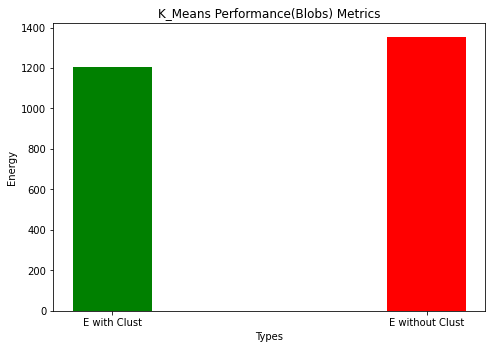

In [124]:
# Plotting the energies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ens = ['E with Clust','E without Clust']
vals = [energy,energy_without]
ax.bar(ens,vals,width=0.25,color=('green','red'))
plt.xlabel("Types")
plt.ylabel("Energy")
plt.title('K_Means Performance(Blobs) Metrics')
plt.savefig("../Performance/wsn_clust_kmeans_blobs_perf.jpg",bbox_inches = "tight")
plt.show()

In [98]:
# # Using Elbow method to determine appropriate number of clusters

# distortions = []
# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(X)
#     distortions.append(km.inertia_)

# # plot
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()